# Chapter 12: Training Artificial Neural Networks for Image Recognition

In this notebook I work through chapter 12 of Python Machine Learning—see [the author's definitive notes](http://nbviewer.jupyter.org/github/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb).

## Loading in the MNIST hand written image data set

In [1]:
import os
import struct
import numpy as np

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
 
    return images, labels

In [2]:
X_train, y_train = load_mnist('mnist', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [3]:
X_test, y_test = load_mnist('mnist', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


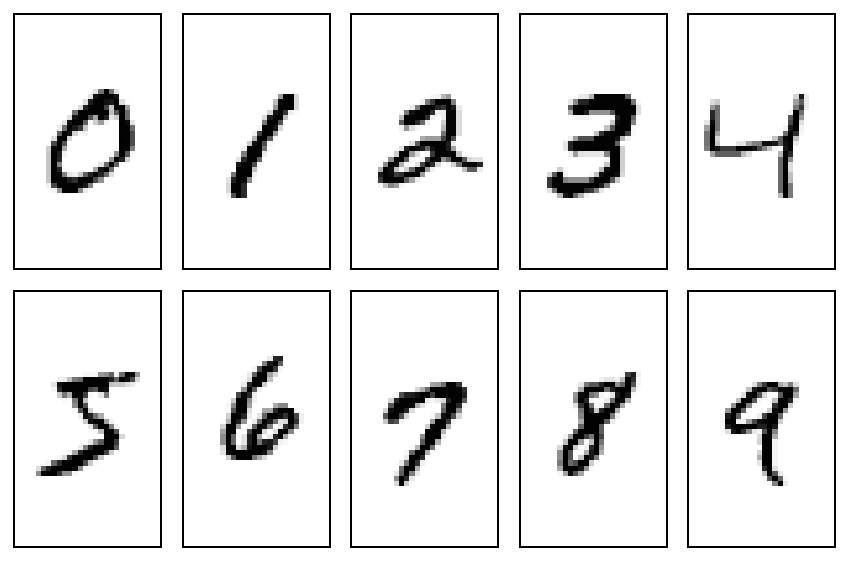

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Show a bunch of 4s

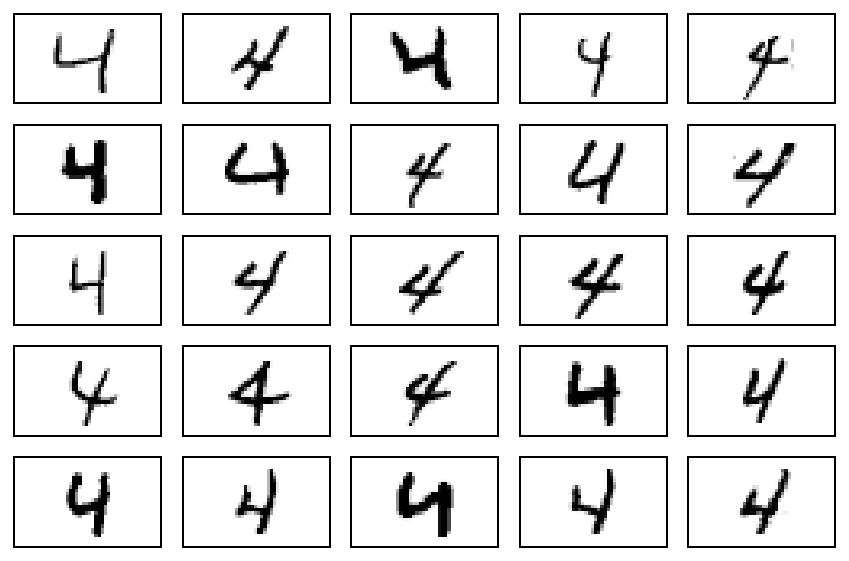

In [5]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 4][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Classifying with tree based models

Let's see how well some other models do before we get to the neural net.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree10 = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
tree100 = DecisionTreeClassifier(criterion='entropy', max_depth=100, random_state=0)

rf10 = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)
rf100 = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=1)

labeled_models = [
    ('decision tree depth 10', tree10),
    ('decision tree depth 100', tree100),
    ('random forest 10 estimators', rf10),
    ('random forest 100 estimators', rf100),
]


In [7]:
import time
import subprocess

def say_done(label):
    subprocess.call("say 'done with {}'".format(label), shell=True)

for label, model in labeled_models:
    before = time.time()
    model.fit(X_train, y_train)
    after = time.time()

    print("{} fit the dataset in {:.1f} seconds".format(label, after - before))
    say_done(label)

decision tree depth 10 fit the dataset in 15.2 seconds
decision tree depth 100 fit the dataset in 19.1 seconds
random forest 10 estimators fit the dataset in 5.3 seconds
random forest 100 estimators fit the dataset in 52.6 seconds


In [8]:
from sklearn.metrics import accuracy_score

for label, model in labeled_models:
    print("{} training fit: {:.3f}".format(label, accuracy_score(y_train, model.predict(X_train)))) 
    print("{} test accuracy: {:.3f}".format(label, accuracy_score(y_test, model.predict(X_test)))) 

decision tree depth 10 training fit: 0.912
decision tree depth 10 test accuracy: 0.872
decision tree depth 100 training fit: 1.000
decision tree depth 100 test accuracy: 0.886
random forest 10 estimators training fit: 0.999
random forest 10 estimators test accuracy: 0.946
random forest 100 estimators training fit: 1.000
random forest 100 estimators test accuracy: 0.969
